In [2]:
!pip3 install ACO-Pants


  Created wheel for ACO-Pants: filename=ACO_Pants-0.5.2-cp36-none-any.whl size=18855 sha256=68aa2cf55a20f072c5bc1c716d37524c5961f9e384d9e00839840dee50aa63ee
  Stored in directory: /root/.cache/pip/wheels/96/54/43/24aef81d408a74657e0cc72e811dd69b4a8f1d20c3ae758129
Successfully built ACO-Pants


In [0]:
import pants
import math
import random
import networkx as nc

In [0]:
nodes = []
for _ in range(100):
  x = random.uniform(-10, 10)
  y = random.uniform(-10, 10)
  nodes.append((x,y))

In [12]:
nodes

[(8.944907243475939, -7.256947604826085),
 (-3.5967627892991256, 7.518761918423117),
 (5.588180249939889, 3.8870413971592033),
 (5.753947019749237, -3.122118170866428),
 (-0.35563031756854, 2.4204918786802807),
 (-8.064243791718678, -7.617946258588186),
 (-1.3790792000290324, -8.641178443384199),
 (-7.6578562983802545, -0.6454842054879055),
 (-6.079656509825709, -9.154970127497267),
 (9.889699027576231, 3.4567170944543317),
 (-7.536711600986683, 8.612986558448092),
 (7.184078823673897, 1.591035431929054),
 (2.1906467763035415, 8.282674078348641),
 (9.022284534616222, 1.699211307786154),
 (-3.460558815887593, 4.66630227936303),
 (-3.2359418454049527, -8.61838507108742),
 (-0.840417565065323, 6.895341601618046),
 (5.271771325480607, 2.477358969259223),
 (-2.2916660529206823, -5.459770459549961),
 (2.8009432499962763, -8.356653211407583)]

In [8]:
type(nodes[0])

list

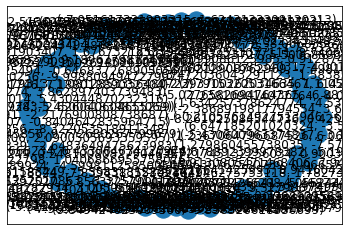

In [16]:
graph = nc.Graph()
for i in nodes:
  graph.add_node(i)

nc.draw_networkx(graph,arrows = True, with_label= True)

So 20 nodes exist as their coordinates, on a graph. Now need to add the weights

In [17]:
for i in nodes:
  currentNodeX = i[0]
  currentNodeY = i[1]
  for n in nodes:
    targetNodeX = n[0]
    targetNodeY = n[1]
    if currentNodeX!= targetNodeX and currentNodeY != targetNodeY:
      xDifToPower = math.pow((targetNodeX - currentNodeX), 2)
      yDifToPower = math.pow((targetNodeY - currentNodeY), 2)
      theWeight = abs(math.sqrt(xDifToPower+yDifToPower))
      graph.add_edge(i,n, weight = theWeight)



Streaming output truncated to the last 5000 lines.
(2.977745570641247, -5.907685568141268)
(0.33612059962529095, -6.945841013936411)
With weight: 
2.838300409951202
Edge added between:
(2.977745570641247, -5.907685568141268)
(3.7822691252010863, -3.3757911139762653)
With weight: 
2.6566421808126695
Edge added between:
(2.977745570641247, -5.907685568141268)
(6.647185201020324, -3.54917469826362)
With weight: 
4.362036304792472
Edge added between:
(2.977745570641247, -5.907685568141268)
(-1.4342896248118624, -7.839438355302402)
With weight: 
4.816401498693995
Edge added between:
(2.977745570641247, -5.907685568141268)
(-0.9425727954216576, -3.8865118333476323)
With weight: 
4.41067334513788
Edge added between:
(2.977745570641247, -5.907685568141268)
(-8.843202430043494, -8.238751469638947)
With weight: 
12.048596593463396
Edge added between:
(2.977745570641247, -5.907685568141268)
(7.383606877841174, -8.1233728455335)
With weight: 
4.931620825801519
Edge added between:
(2.97774557064124

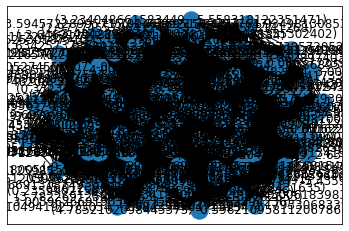

In [18]:
nc.draw_networkx(graph,arrows = True, with_label= True)

All edges are created with their weights between them

In [0]:
def euclidean(a, b):
    return math.sqrt(pow(a[1] - b[1], 2) + pow(a[0] - b[0], 2))

In [0]:
world = pants.World(nodes, euclidean)

In [0]:
solver = pants.Solver()

solution = solver.solve(world) --> Returns the best solution found
solutions = solver.solutions(world) --> Returns each solution found if it is the best thus far

In [0]:
solution = solver.solve(world) # Returns the best solution found solutions

solutions = solver.solutions(world) # Returns each solution found if it is the best thus far

In [24]:
print(solution.distance)
print(solution.tour)    # Nodes visited in order
print(solution.path)    # Edges taken in order

256.1113165628471
[(-0.21057614927513946, -6.8522058483158315), (-0.08203418804144924, -5.450061839833069), (-0.18916086346536787, -5.4359839101493), (1.6918611224268272, -4.164371417901771), (1.634257378624774, -4.532390724684825), (2.3749048490142464, -4.022243148222131), (3.7822691252010863, -3.3757911139762653), (5.012390814198703, -4.1852564928431635), (5.860087168534031, -4.001479229039506), (3.4526461453591377, -5.881816362763441), (2.977745570641247, -5.907685568141268), (3.234048661583449, -5.558318122351471), (4.059630767580739, 0.06657723900337409), (4.7852102098445375, -0.39621095811206786), (4.590615148091635, -1.3319749564908019), (3.920893397563944, -1.2089176050244799), (3.59457228995735, -0.7889215699977647), (3.5035569676613054, 0.6516258321344832), (3.472036043291123, 1.5838511460352684), (4.078884204150619, 2.63290790417868), (4.421216049282934, 3.005055602900475), (3.072077722746208, 5.4687242013170145), (3.1562657118698905, 7.039300024835544), (1.2367064796687526,

In [25]:
best = float("inf")
for currentSolution in solutions:
  assert currentSolution.distance < best
  best = currentSolution.distance
  print(best)

289.94837138948424
289.20924936812054
286.4740797166147
286.4634659605783
279.0261913265915
267.3517176346119
256.57680530301366
243.97357671312392


https://pypi.org/project/ACO-Pants/
